In [1]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [352]:
train_path ="../train.csv"
train_data = pd.read_csv( train_path  )
train_data.head(10)

,Unnamed: 0,android_id,apptype,carrier,dev_height,dev_ppi,dev_width,label,lan,media_id,...,os,osv,package,sid,timestamp,version,fea_hash,location,fea1_hash,cus_type
0,0,316361,1199,46000.0,0.0,0.0,0.0,1,NaN,104,...,android,9,18,1438873,1.559893e+12,8,2135019403,0,2329670524,601
1,1,135939,893,0.0,0.0,0.0,0.0,1,NaN,19,...,android,8.1,0,1185582,1.559994e+12,4,2782306428,1,2864801071,1000
2,2,399254,821,0.0,760.0,0.0,360.0,1,NaN,559,...,android,8.1.0,0,1555716,1.559837e+12,0,1392806005,2,628911675,696
3,3,68983,1004,46000.0,2214.0,0.0,1080.0,0,NaN,129,...,android,8.1.0,0,1093419,1.560042e+12,0,3562553457,3,1283809327,753
4,4,288999,1076,46000.0,2280.0,0.0,1080.0,1,zh-CN,64,...,android,8.0.0,0,1400089,1.559867e+12,5,2364522023,4,1510695983,582
5,5,184658,788,46000.0,2196.0,480.0,1080.0,1,zh-CN,194,...,Android,8.1.0,35,1253737,1.559976e+12,5,1655793887,5,1080320295,430
6,6,0,1106,46000.0,0.0,0.0,0.0,0,NaN,39,...,android,9,123,1387136,1.559845e+12,0,369486452,6,4190764663,411
7,7,0,1001,46000.0,760.0,0.0,360.0,1,zh-CN,29,...,Android,8.1.0,4,1597216,1.559783e+12,0,3912031003,7,2627690535,411
8,8,646994,893,0.0,0.0,0.0,0.0,0,NaN,19,...,android,8.1,0,1910989,1.559549e+12,4,3307888762,8,2961728815,886
9,9,0,1001,46000.0,760.0,0.0,360.0,1,zh-CN,29,...,Android,8.1.0,4,1785622,1.559646e+12,0,1485855711,9,2678022183,411


In [9]:
train_data.isnull().sum() / len(train_data )

Unnamed: 0    0.000000
android_id    0.000000
apptype       0.000000
carrier       0.000000
dev_height    0.000000
dev_ppi       0.000000
dev_width     0.000000
label         0.000000
lan           0.366560
media_id      0.000000
ntt           0.000000
os            0.000000
osv           0.013122
package       0.000000
sid           0.000000
timestamp     0.000000
version       0.000000
fea_hash      0.000000
location      0.000000
fea1_hash     0.000000
cus_type      0.000000
dtype: float64

In [ ]:
train_data.label.value_counts()

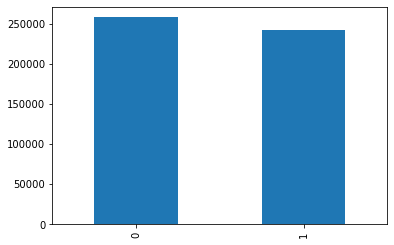

In [18]:
train_data.label.value_counts().plot.bar()

In [19]:
train_data = train_data.drop("Unnamed: 0" , axis = 1 )

In [27]:
features = train_data.drop('label' ,axis =1 ).columns.tolist()
features 

['android_id',
 'apptype',
 'carrier',
 'dev_height',
 'dev_ppi',
 'dev_width',
 'lan',
 'media_id',
 'ntt',
 'os',
 'osv',
 'package',
 'sid',
 'timestamp',
 'version',
 'fea_hash',
 'location',
 'fea1_hash',
 'cus_type']

In [30]:
train_data.lan.value_counts()

zh-CN          244474
zh              30574
cn              20685
zh_CN           11602
Zh-CN            8122
zh-cn             642
ZH                185
CN                168
tw                119
en                 89
zh_CN_#Hans        26
ko                 11
zh-TW               7
en-US               3
zh-HK               3
en-GB               2
it                  2
ja                  2
TW                  2
mi                  1
zh-MO               1
Name: lan, dtype: int64

In [36]:
train_data.lan.fillna("zh-CN" ,inplace= True)

In [38]:
train_data['lan'] = train_data.lan.apply( lambda x :x.lower())

In [40]:
train_data['lan'].value_counts() # 其实需要放弃这个特征 ，绝大部分都是zh ，也没有必要进行map了

zh-cn          436518
zh              30759
cn              20853
zh_cn           11602
tw                121
en                 89
zh_cn_#hans        26
ko                 11
zh-tw               7
zh-hk               3
en-us               3
it                  2
ja                  2
en-gb               2
zh-mo               1
mi                  1
Name: lan, dtype: int64

In [41]:
train_data.drop('lan' ,axis = 1 , inplace= True )

In [42]:
train_data.osv # 操作系统版本吗

0             9
1           8.1
2         8.1.0
3         8.1.0
4         8.0.0
          ...  
499995    7.1.2
499996    8.1.0
499997    6.0.1
499998    5.1.1
499999    8.1.0
Name: osv, Length: 500000, dtype: object

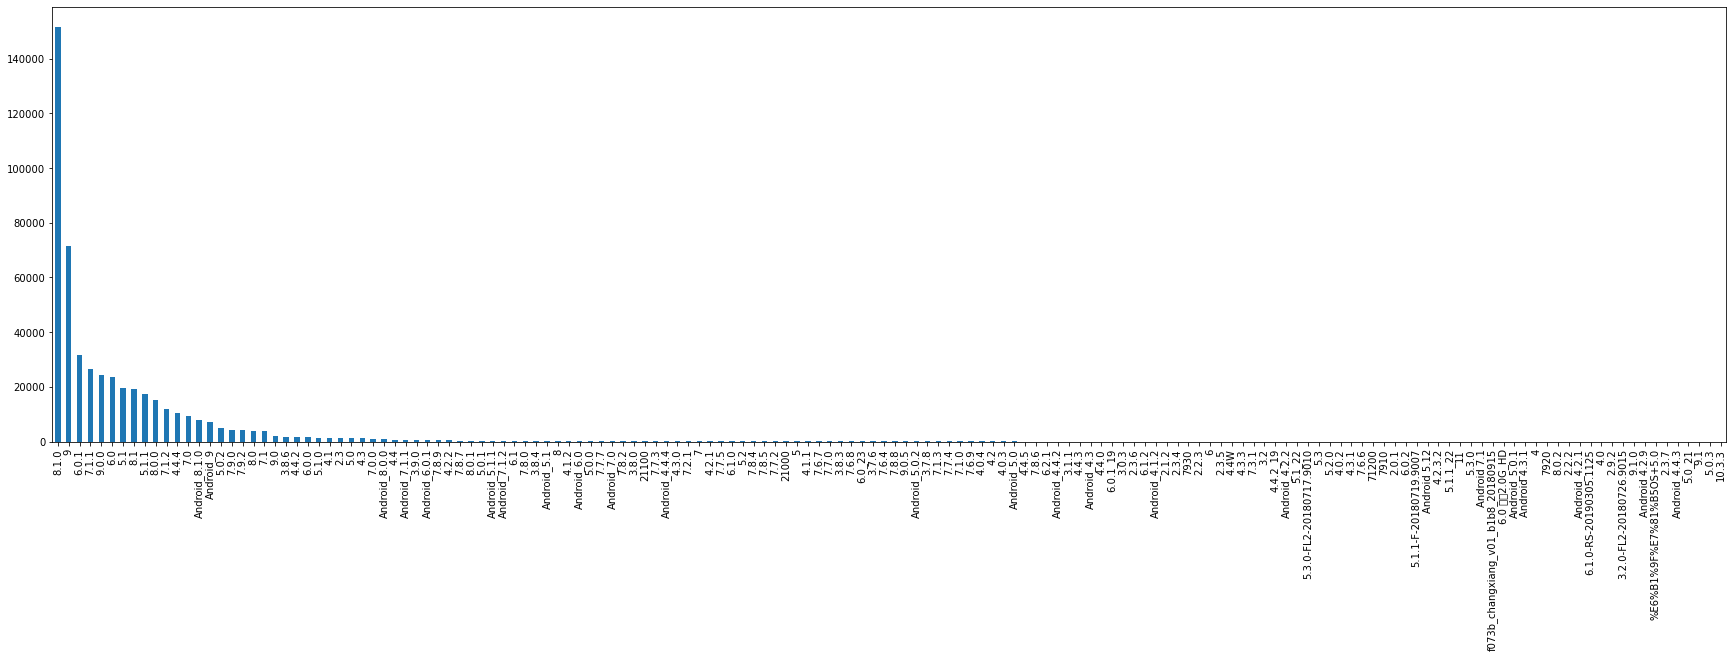

In [57]:
import re 
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=( 30 ,8))
train_data.osv.value_counts().plot.bar()

In [60]:
train_data.osv.fillna('8.1.0' ,inplace= True)

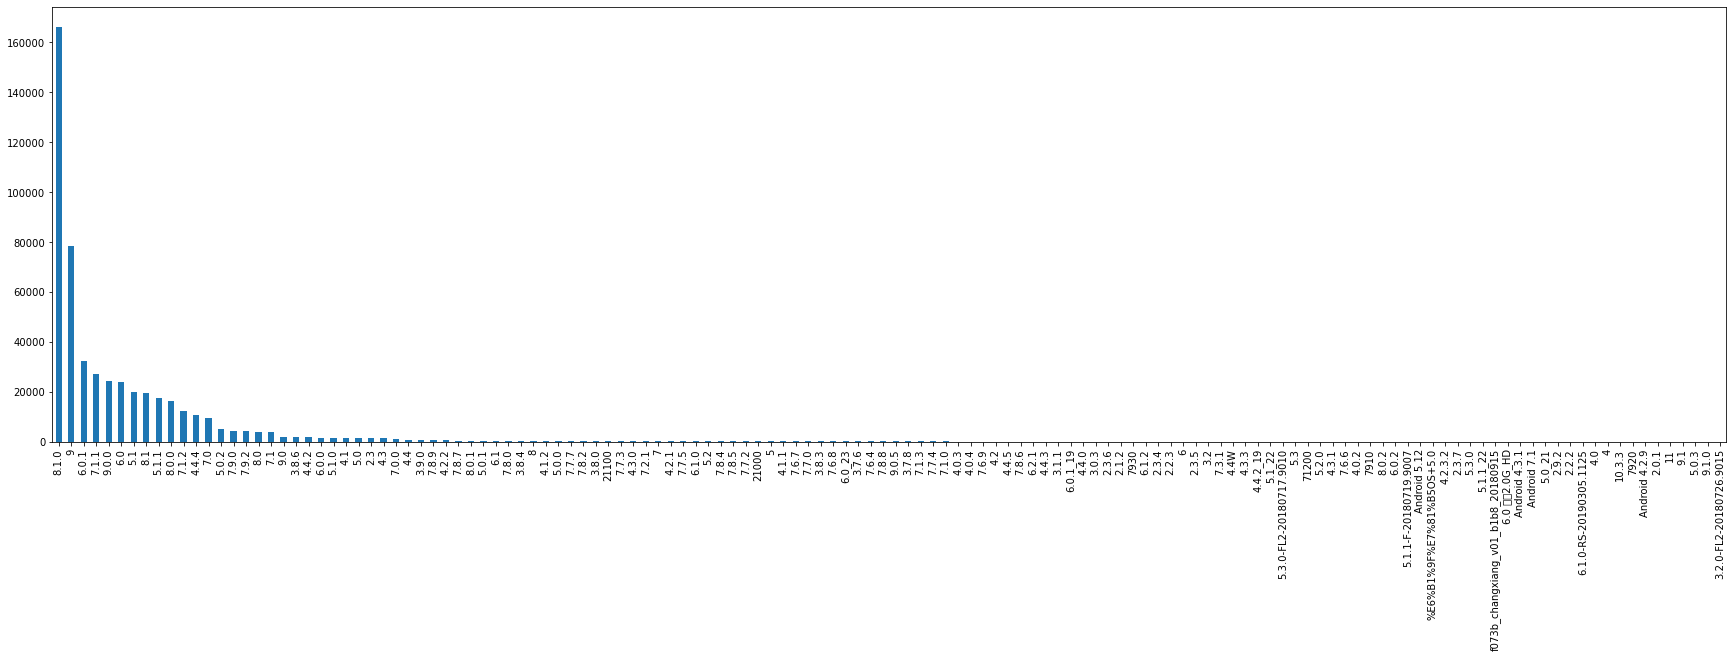

In [64]:
plt.figure(figsize=( 30 ,8))
train_data.osv.apply(  lambda x: x.replace("Android_" ,"" )).value_counts().plot.bar()

In [70]:
train_data['osv'] = train_data.osv.apply(
    lambda x: x.replace("Android_" ,"" ))

In [86]:
def osv_fun(x ):
    l = [ str(i) for i in range(10)]
    if x[0] in l:
        return x[0]
    else :
        return 'u'

In [87]:
train_data['osv'] = train_data.osv.apply(osv_fun)

In [88]:
train_data['osv'].value_counts()

8    206002
9    104712
7     64592
6     58006
5     45737
4     16682
3      2752
2      1509
u         6
1         2
Name: osv, dtype: int64

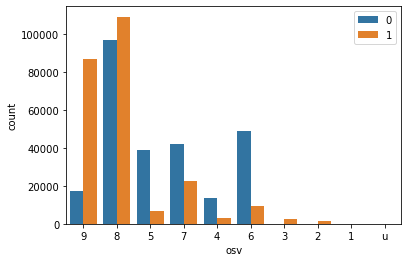

In [98]:
import seaborn as sns 
sns.countplot( x='osv' , hue ='label' , data= train_data )
plt.legend(loc = 'upper right')

In [93]:
train_data.drop( 'os' , axis =1 , inplace= True )

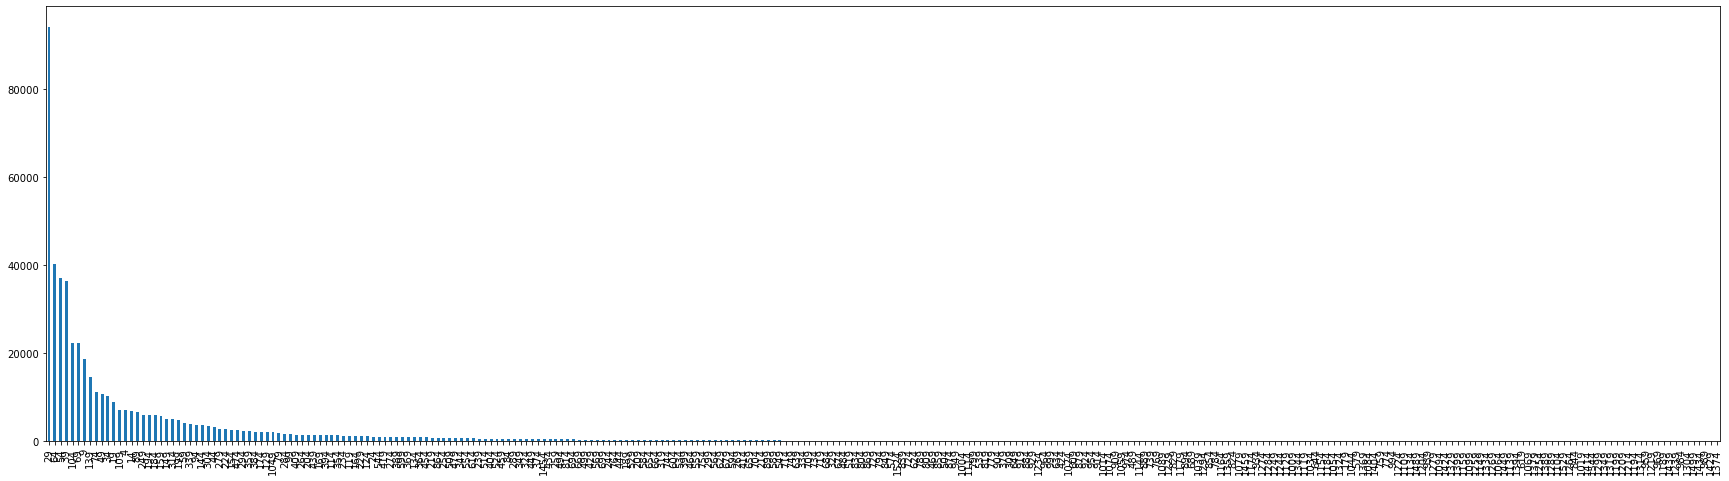

In [113]:
plt.figure(figsize=( 30 ,8))
train_data.media_id.value_counts().plot.bar()

In [207]:
print( len(train_data.media_id.value_counts()))
media_cates = train_data.media_id.value_counts().index
u_media_list = media_cates[train_data.media_id.value_counts() <1000]
print (u_media_list)

284
Int64Index([ 419,  274,  389,  599,  369,  134,  364,  454,  219,  864,
            ...
            1189, 1439, 1239,  984, 1304, 1499, 1434,  989, 1429, 1374],
           dtype='int64', length=227)


In [208]:
def media_id_fun( x ):
    if  x in u_media_list:
        return 'u'
    else :
        return x 
train_data['media_id'] = train_data.media_id.apply( media_id_fun )

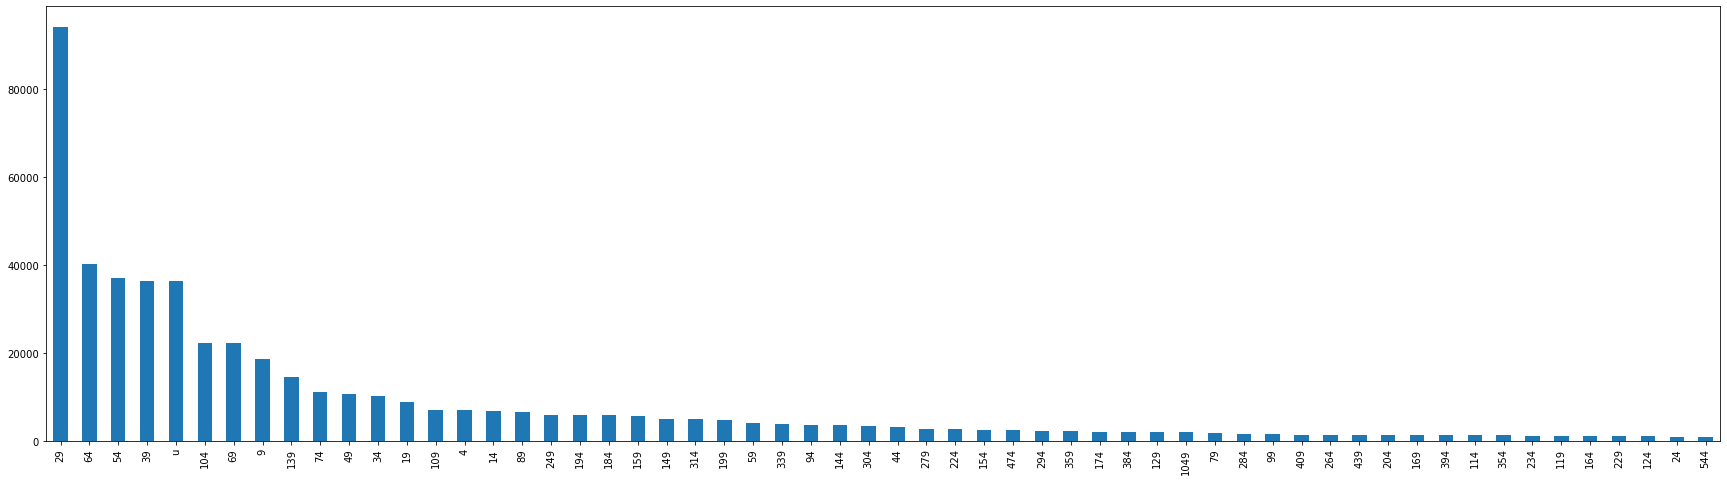

In [209]:
plt.figure(figsize=( 30 ,8))
train_data['media_id'].value_counts().plot.bar()

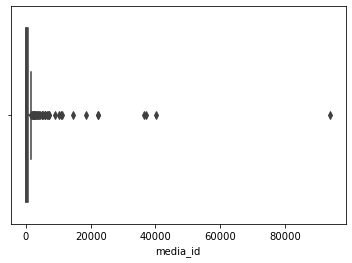

In [223]:
sns.boxplot(train_data.media_id.value_counts()) # 并不是异常值

284
Int64Index([ 224,  154,  474,  294,  359,  384,  174,  129, 1049,   79,
            ...
            1189, 1439, 1239,  984, 1304, 1499, 1434,  989, 1429, 1374],
           dtype='int64', length=254)


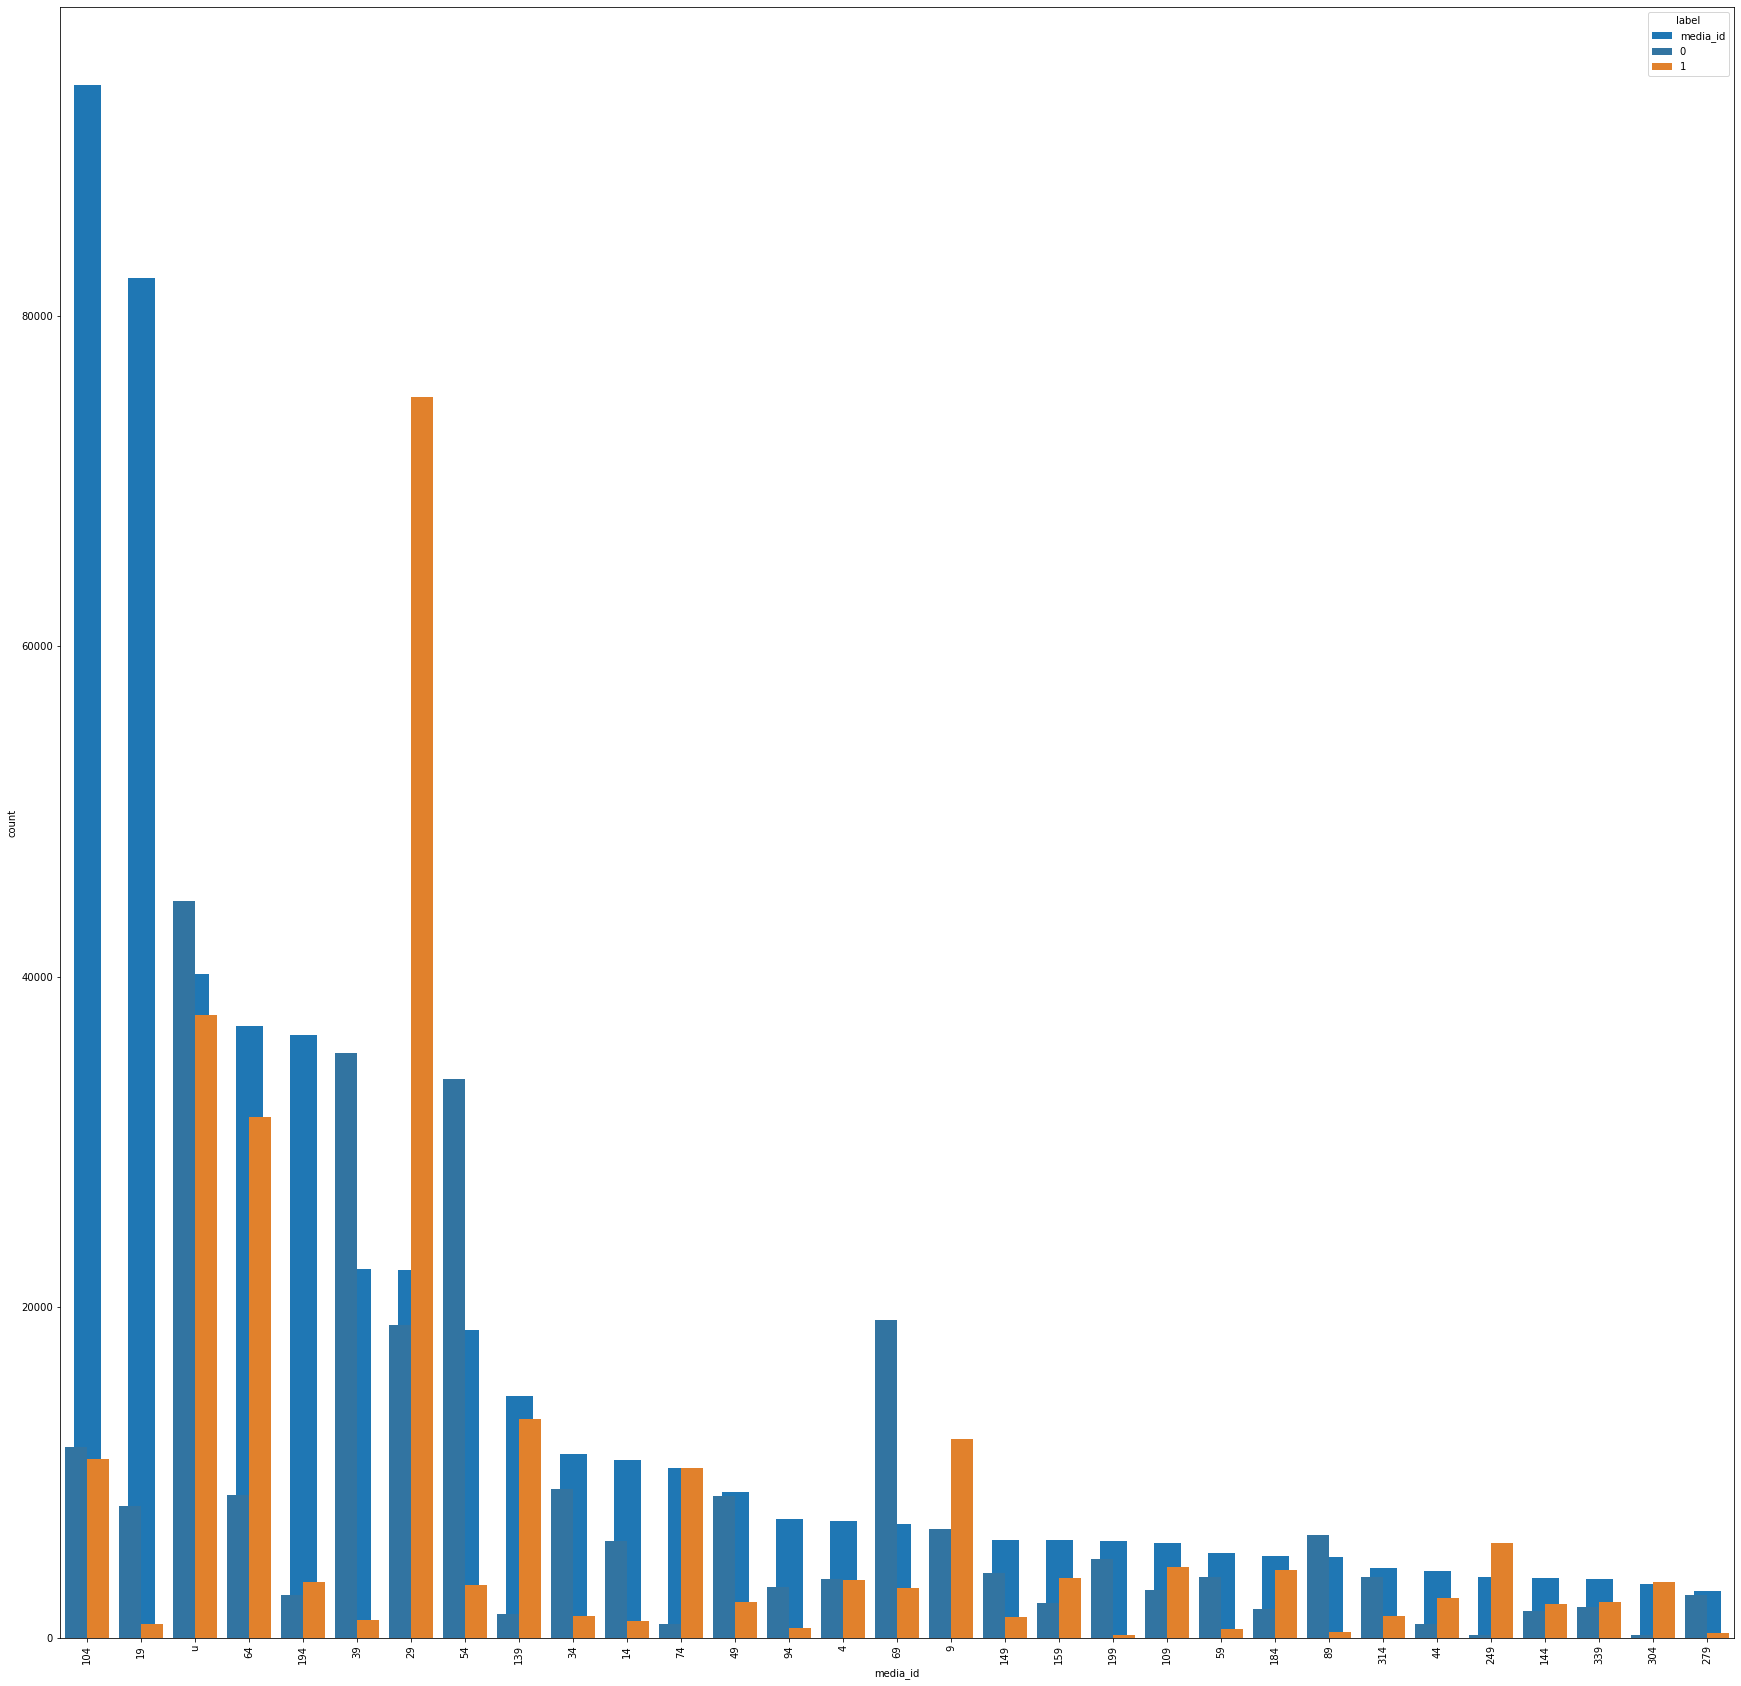

In [289]:
print( len(train_data.media_id.value_counts()))
media_cates = train_data.media_id.value_counts().index
u_media_list = media_cates[ -(len(media_cates) - 30) :]
print (u_media_list)

def media_id_fun( x ):
    if  x in u_media_list:
        return 'u'
    else :
        return x 
train_data['media_id'] = train_data.media_id.apply( media_id_fun )

plt.figure(figsize=( 30 ,8))
train_data['media_id'].value_counts().plot.bar()
sns.countplot(x ='media_id' , hue='label' , data= train_data )

In [246]:
select_show = train_data['media_id'].value_counts()[:20].index.tolist()
temp =pd.DataFrame()
for col in select_show :
    temp =pd.concat( [temp , 
                    train_data.loc[train_data['media_id'] == col , :] ] ,axis = 0 )

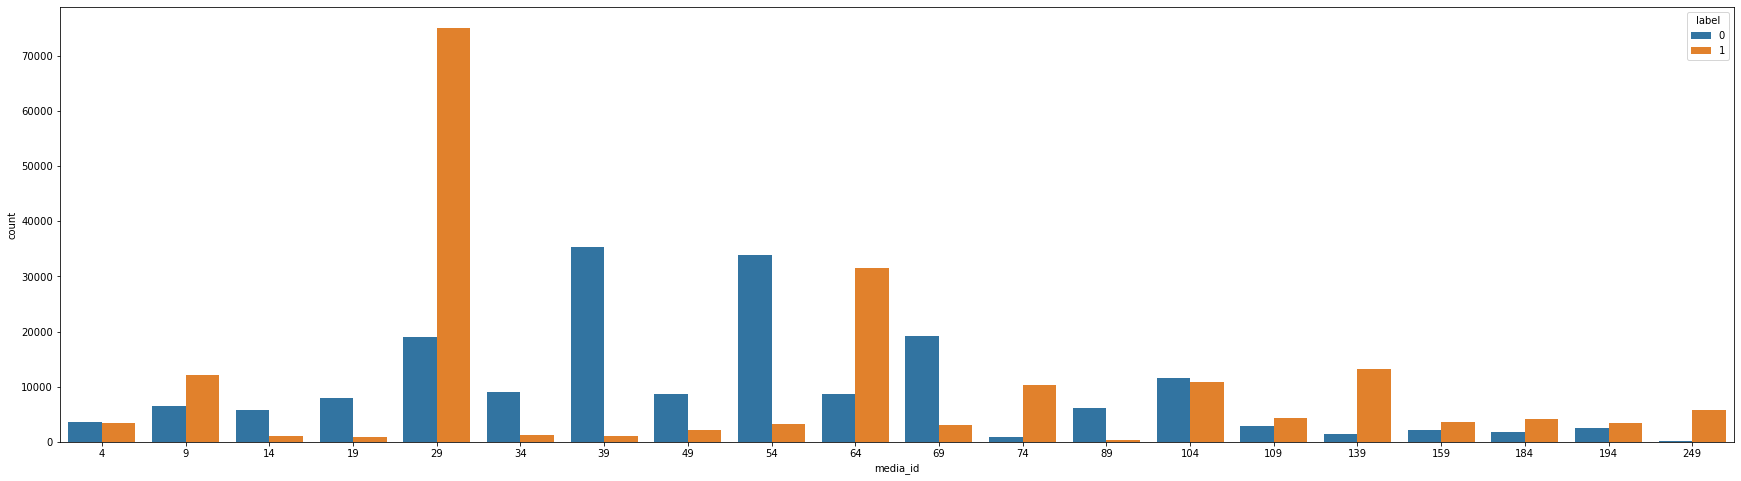

In [248]:
plt.figure(figsize=( 30 ,8))
sns.countplot(x ='media_id' , hue='label' , data= temp )

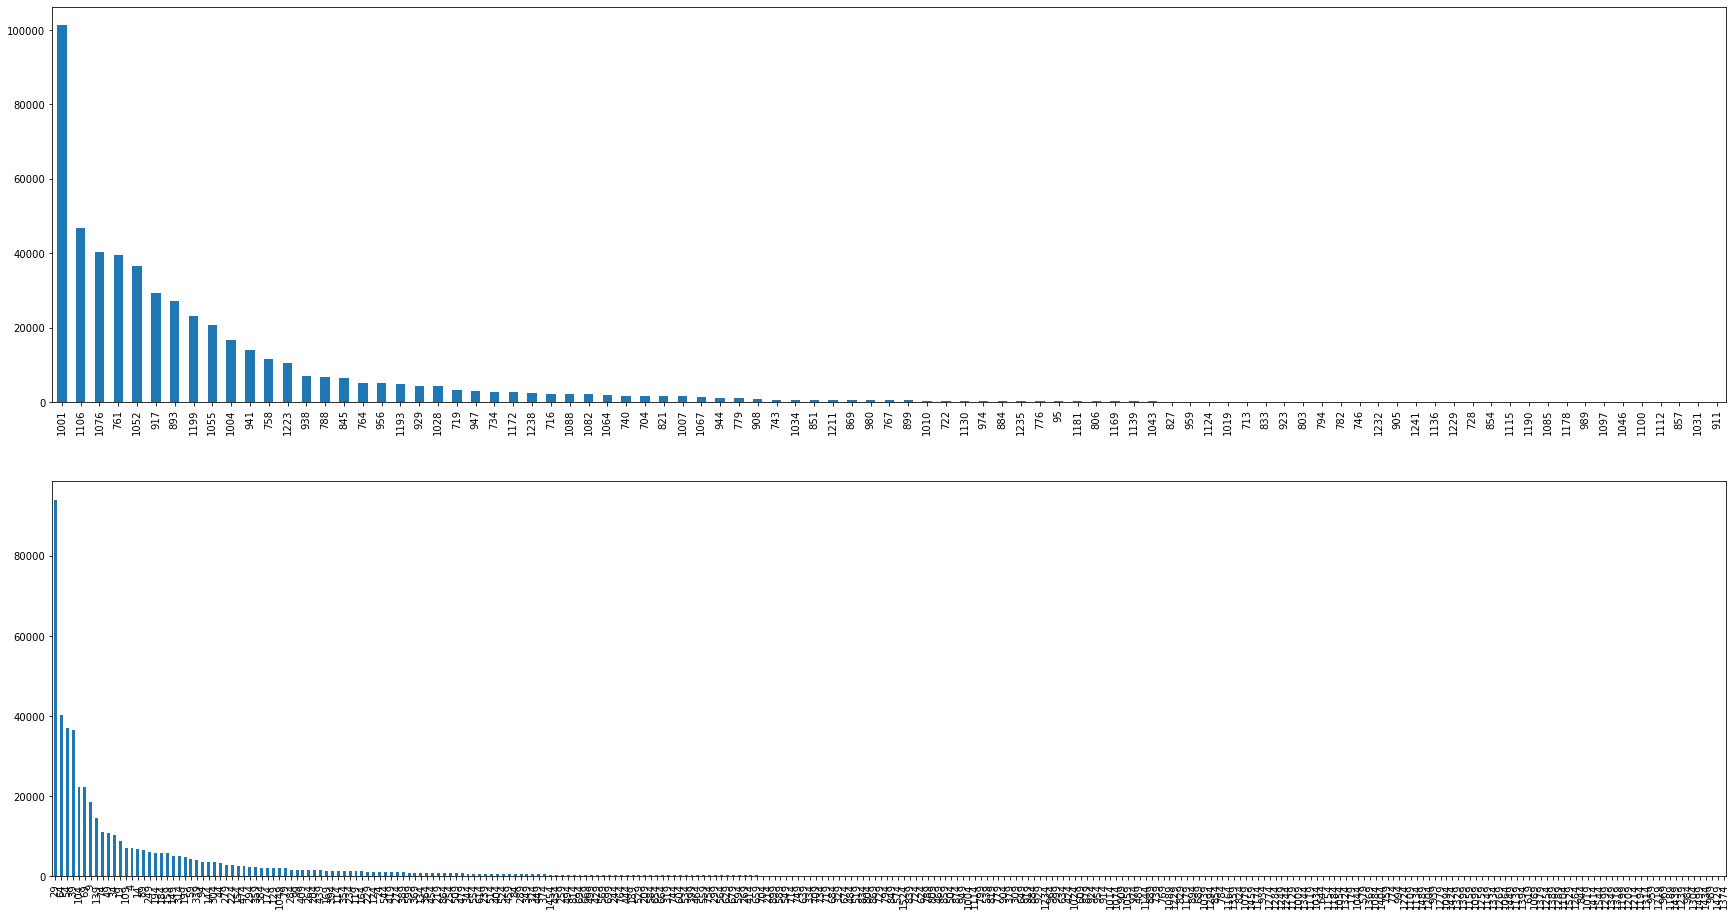

In [283]:
fig = plt.figure(figsize=( 30 ,16))
fig.add_subplot(2,1 ,1)
train_data.apptype.value_counts().plot.bar()
fig.add_subplot(2, 1 ,2)
train_data.media_id.value_counts().plot.bar()

In [ ]:
def keep_topk( x  , colname  , k = 30 ):
    _cates = train_data[colname].value_counts().index
    u__list = _cates[ -(len(_cates) -k) :]
    
    if  x in u__list:
        return 'u'
    else :
        return x 
    
train_data['apptype'] = train_data.media_id.apply( 
                lambda x :keep_topk( x,'apptype' ) )

plt.figure(figsize=( 30 ,8))
train_data['apptype'].value_counts().plot.bar()
sns.countplot(x ='apptype' , hue='label' , data= train_data )

In [ ]:
def keep_topk( x  , colname  , k = 30 ):
    _cates = train_data[colname].value_counts().index
    u__list = _cates[ -(len(_cates) -k) :]
    
    if  x in u__list:
        return 'u'
    else :
        return x 
    
train_data['media_id'] = train_data.media_id.apply( 
                lambda x :keep_topk( x,'media_id' ) )

plt.figure(figsize=( 30 ,8))
train_data['media_id'].value_counts().plot.bar()
sns.countplot(x ='media_id' , hue='media_id' , data= train_data )

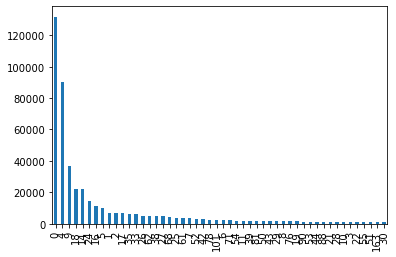

In [299]:
train_data.package.value_counts()[:50].plot.bar()

In [314]:
train_data.ntt.value_counts() # 就让未知 0.0 作为一类吧 

2.0    318597
6.0    116548
5.0     35021
0.0     20617
3.0      4463
4.0      4446
7.0       306
1.0         2
Name: ntt, dtype: int64

In [316]:
train_data.carrier.value_counts() # -1.0 归于0.0 

 46000.0    359409
 46001.0     43390
 0.0         40652
 46003.0     32294
-1.0         24255
Name: carrier, dtype: int64

In [317]:
train_data.loc[train_data.carrier ==-1.0 ,'carrier' ] = 0.

In [318]:
train_data.carrier.value_counts() # -1.0 归于0.0 

46000.0    359409
0.0         64907
46001.0     43390
46003.0     32294
Name: carrier, dtype: int64

In [322]:
train_data.timestamp =train_data.timestamp.astype('int64') //1000 
train_data.timestamp

0         1559892728
1         1559994020
2         1559836697
3         1560041977
4         1559867301
             ...    
499995    1559834058
499996    1559814054
499997    1559675697
499998    1559840367
499999    1559921566
Name: timestamp, Length: 500000, dtype: int64

In [323]:
train_data.area = train_data.dev_height * train_data.dev_width 

In [327]:
(train_data.dev_height>0).sum()  / len( train_data)

0.785972

In [328]:
(train_data.dev_width>0).sum()  / len( train_data)

0.785978

In [330]:
 train_data.dev_height.value_counts()

0.0       107014
1920.0     66944
760.0      38393
1280.0     32072
2340.0     29538
           ...  
1145.0         1
615.0          1
844.0          1
2845.0         1
717.0          1
Name: dev_height, Length: 798, dtype: int64

In [353]:
test1 = pd.read_csv('../test1.csv')
test1.columns

Index(['Unnamed: 0', 'android_id', 'apptype', 'carrier', 'dev_height',
       'dev_ppi', 'dev_width', 'lan', 'media_id', 'ntt', 'os', 'osv',
       'package', 'sid', 'timestamp', 'version', 'fea_hash', 'location',
       'fea1_hash', 'cus_type'],
      dtype='object')

In [340]:
len(train_data.columns)

21

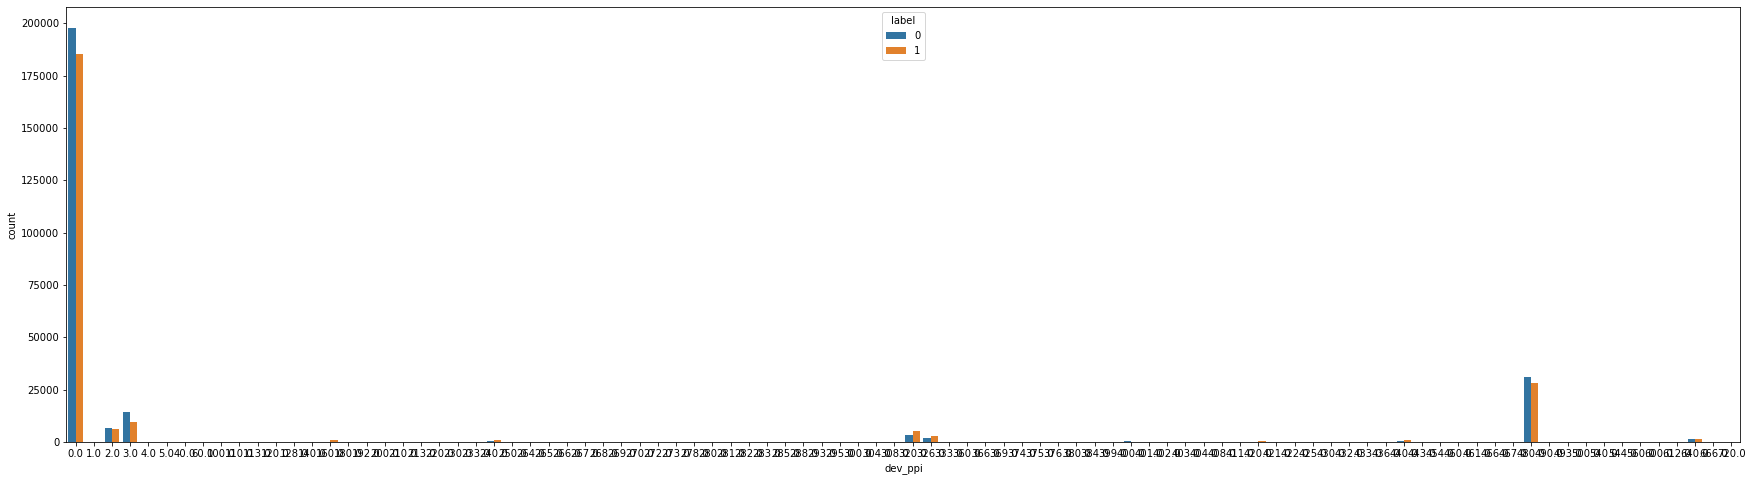

In [357]:
plt.figure(figsize=( 30 ,8))
sns.countplot( x= 'dev_ppi' , hue= 'label' , data =train_data )

In [354]:
test1['label'] = 0
train_test = pd.concat( [train_data , test1] ,axis = 0 )

In [359]:
train_test  = train_test[ ['android_id', 'apptype', 'carrier' ,
                          'media_id', 'ntt',  'osv','package', 
                           'sid', 'version', 'fea_hash', 'location',
                               'fea1_hash', 'cus_type']]
train_test 

,android_id,apptype,carrier,media_id,ntt,osv,package,sid,version,fea_hash,location,fea1_hash,cus_type
0,316361,1199,46000.0,104,6.0,9,18,1438873,8,2135019403,0,2329670524,601
1,135939,893,0.0,19,6.0,8.1,0,1185582,4,2782306428,1,2864801071,1000
2,399254,821,0.0,559,0.0,8.1.0,0,1555716,0,1392806005,2,628911675,696
3,68983,1004,46000.0,129,2.0,8.1.0,0,1093419,0,3562553457,3,1283809327,753
4,288999,1076,46000.0,64,2.0,8.0.0,0,1400089,5,2364522023,4,1510695983,582
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0,1001,46000.0,29,2.0,8.1.0,4,1165373,0,3162887451,126,2711576615,411
149996,0,1001,46000.0,29,2.0,9.0.0,4,1444115,0,97238959,322,2678022183,411
149997,0,1001,46000.0,29,5.0,8.1.0,4,1134378,0,1320118495,46,2610913319,411
149998,500925,1052,46000.0,249,6.0,4.4.2,0,1700238,2,1292986591,41,1898209327,430
